In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

df=pd.read_csv("../data/raw/Car_details_v3.csv")
#The data source is the following https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [429]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Feature engineering

In [430]:
#Check if there are duplicate rows
df[df.duplicated(keep='first')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [431]:
#keep only one of the duplicate rows
df=df.drop_duplicates()

In [432]:
len(df)

6926

In [433]:
(8128-6926)/8128*100
#This drops 15% of our data

14.788385826771652

In [434]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [435]:
#We have 209 columns with missing values, lets see how the values for each look like 

In [436]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [437]:
#The cubic capacity (CC) refers to the amount of air and fuel that can be pushed through the cylinders in the engine.
#In most cases,the bigger the engine capacity, the more powerful it is.
#Making sure that the engine units are the same for all rows and are in cubic centimeters (CC) 
len(df[df["engine"].str.split().str[1]=="CC"])
#this is consistent with 6926-208=6718 non zero values in this column

6718

In [438]:
#Getting rid of the units and storing the numbers as float
df["engine"]=df["engine"].str.split().str[0].astype(float)

In [439]:
#Maxpower with units brake horsepower (bhp) is a measurement of the engine's power that accounts for frictional losses in the engine
#Maxpower  has 4 rows with 3 of them with 0 value and 1 with just unit
cond=(df["max_power"].str.split().str[1]!="bhp") & (df["max_power"].str.split().str[0].notnull())
df[cond]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
575,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
1442,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
2549,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0


In [440]:
drop_ind=df[cond].index

In [441]:
#Dropping above 4 rows as they have nan values also for other columns
df=df.drop(drop_ind)

In [442]:
len(df)

6922

In [443]:
#Getting rid of the units and storing the numbers as float
df["max_power"]=df["max_power"].str.split().str[0].astype(float)

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6922 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6922 non-null   object 
 1   year           6922 non-null   int64  
 2   selling_price  6922 non-null   int64  
 3   km_driven      6922 non-null   int64  
 4   fuel           6922 non-null   object 
 5   seller_type    6922 non-null   object 
 6   transmission   6922 non-null   object 
 7   owner          6922 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 757.1+ KB


In [445]:
#Look at the rows with null values
df[pd.isnull(df).any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7740,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [446]:
#These 205 rows have null values for muliple columns, so we will drop them
null_ind=df[pd.isnull(df).any(axis=1)].index
df=df.drop(null_ind)

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 734.7+ KB


In [448]:
#Removing rows with null values reduces statistics by 3%
(6926-6717)/6926*100

3.017614784868611

In [449]:
#Now lets check number of unique values for different categorical variables
df["name"].nunique()  #This doesn't seem as a useful feature to include in price prediction 

1982

In [450]:
df["name"].str.split().str[0].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [451]:
df["name"].str.split().str[0].nunique()

31

In [452]:
df["brand"]=df["name"].str.split().str[0]

In [453]:
df["brand"]=df["brand"].replace({"Land":"Land Rover"})
df["brand"].nunique()

31

In [454]:
df["brand"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land Rover', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat',
       'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [455]:
df=df.drop("name",axis=1)

In [456]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [457]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [458]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [459]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [460]:
df["torque"].head(10)

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
5           113.75nm@ 4000rpm
6        7.8@ 4,500(kgm@ rpm)
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
9              160Nm@ 2000rpm
Name: torque, dtype: object

In [461]:
#We will drop his column since the units used for different rows correspond to different physical quaniies
#Also some of them have fixed values while others show range of vlaues

In [462]:
df=df.drop("torque",axis=1)

In [463]:
#Mileage column has two non-comparable units (kilometer per liter (kmpl) (fuels in liquid state) and kilometers per kilograms (km/kg) (fuels in gaseous state))

In [464]:
df.head(8)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,5.0,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197.0,81.86,5.0,Hyundai
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061.0,57.50,5.0,Maruti
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796.0,37.00,4.0,Maruti


In [465]:
len_liquid=len(df[df["mileage"].str.split().str[1]=="kmpl"])
len_liquid

6631

In [466]:
len_gas=len(df[df["mileage"].str.split().str[1]=="km/kg"])
len_gas

86

In [467]:
len_gas/len(df)*100

1.2803334822093198

In [468]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [469]:
#This is only one percent of data, we can drop corresponding rows
drop_ind_mileage=df[df["mileage"].str.split().str[1]=="km/kg"].index
df=df.drop(drop_ind_mileage)

In [470]:
#Getting rid of the units and storing the numbers as float
df["mileage"]=df["mileage"].str.split().str[0].astype(float)

In [471]:
#We are now left with this many rows
len(df)

6631

# Exploratory data analysis (EDA)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6631 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6631 non-null   int64  
 1   selling_price  6631 non-null   int64  
 2   km_driven      6631 non-null   int64  
 3   fuel           6631 non-null   object 
 4   seller_type    6631 non-null   object 
 5   transmission   6631 non-null   object 
 6   owner          6631 non-null   object 
 7   mileage        6631 non-null   float64
 8   engine         6631 non-null   float64
 9   max_power      6631 non-null   float64
 10  seats          6631 non-null   float64
 11  brand          6631 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 673.5+ KB


<Figure size 1200x900 with 0 Axes>

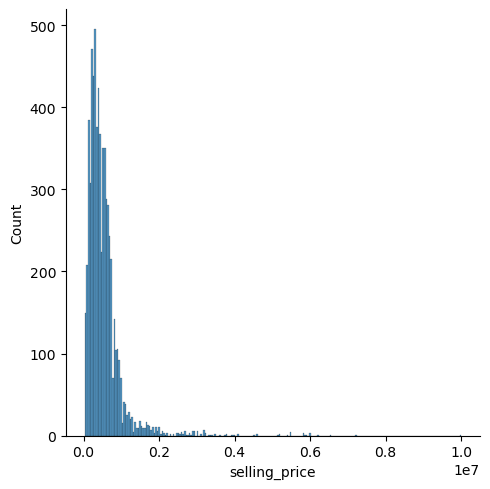

In [473]:
plt.figure(figsize=(8,6),dpi=150)
sns.displot(df["selling_price"])

In [474]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[df['selling_price'] < 4000000]
df_no_outliers_filter=(df['selling_price'] < 4000000)
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.39209772281707134

(array([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

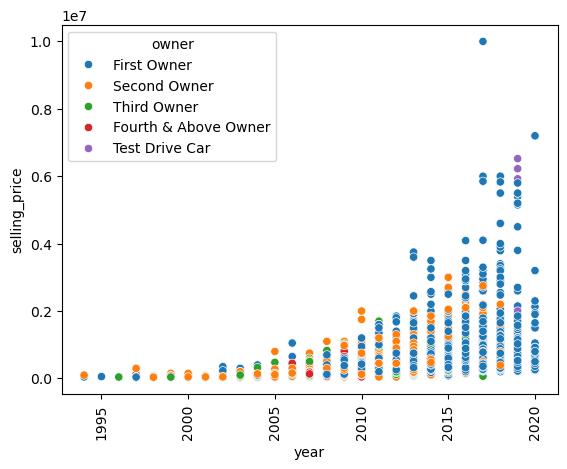

In [475]:
sns.scatterplot(data=df,x="year",y="selling_price",hue="owner")
plt.xticks(rotation=90)
#As expected the newer the car the less owners it had and higher selling price corresponds to newer cars

In [476]:
#Selling price vs the year in which the car was bought shows that there are outliers that need to be removed
df_no_outliers = df[df['year'] > 2000]
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.7540340823405217

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth & Above Owner'),
  Text(4, 0, 'Test Drive Car')])

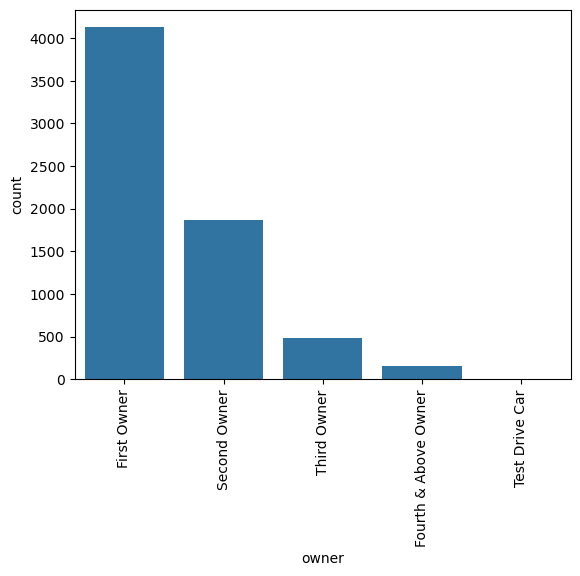

In [477]:
sns.countplot(data=df,x="owner")
plt.xticks(rotation=90)

In [478]:
df_test_drive=df[df["owner"]=="Test Drive Car"]
len(df_test_drive)/len(df)*100

0.07540340823405217

In [479]:
#Since only 0.07% of data has "Test Drive Car" category in "owner" feature, we will drop corresponding rows
df=df[df["owner"]!="Test Drive Car"]
#We will also combine "Third owner" and "Fourth & Above Owners" Categories under "Third and above owners"
df["owner"]=df["owner"].replace({"Third Owner":"Third and above owners","Fourth & Above Owner":"Third and above owners"})

<Axes: xlabel='owner', ylabel='count'>

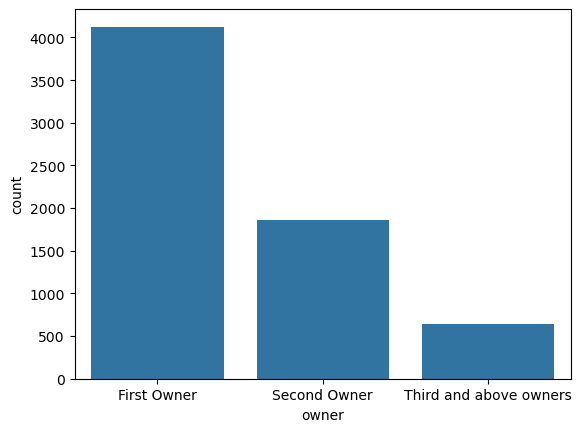

In [480]:
sns.countplot(data=df,x="owner")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Datsun'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes-Benz'),
  Text(13, 0, 'Mitsubishi'),
  Text(14, 0, 'Audi'),
  Text(15, 0, 'Volkswagen'),
  Text(16, 0, 'BMW'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Lexus'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Land Rover'),
  Text(21, 0, 'MG'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Daewoo'),
  Text(24, 0, 'Kia'),
  Text(25, 0, 'Fiat'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel')])

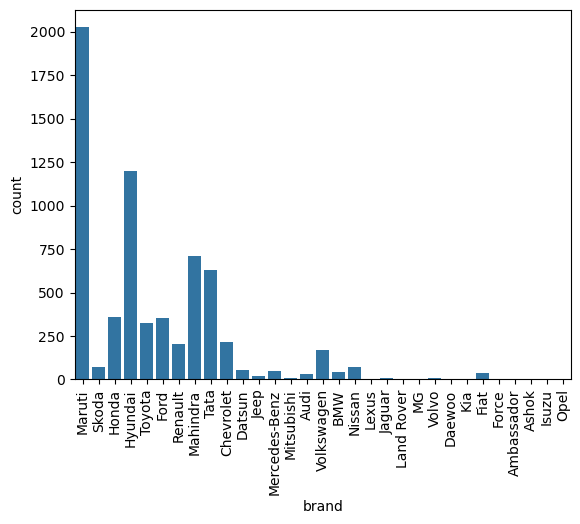

In [481]:
sns.countplot(data=df,x="brand")
plt.xticks(rotation=90)

In [482]:
#We will drop brand name from in further analysis as the brand "Maruti" dominates and most of the other brands are underrepresented
df=df.drop("brand",axis=1)

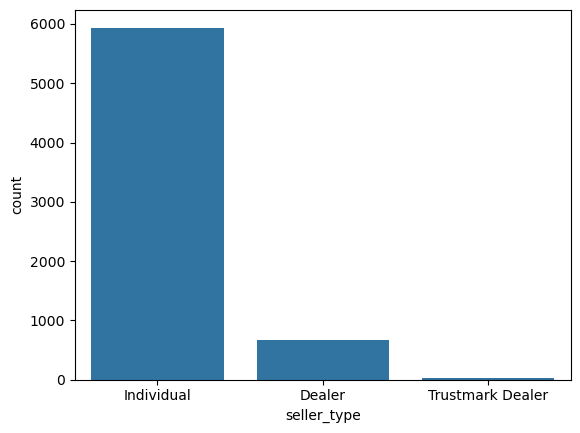

In [ ]:
sns.countplot(data=df,x="seller_type")
# plt.savefig("dealer.png")

In [484]:
df_trustmark=df[df["seller_type"]=="Trustmark Dealer"]
len(df_trustmark)/len(df)*100

0.40748566254150315

In [485]:
df_dealer=df[df["seller_type"]=="Dealer"]
len(df_dealer)/len(df)*100

9.96076063990341

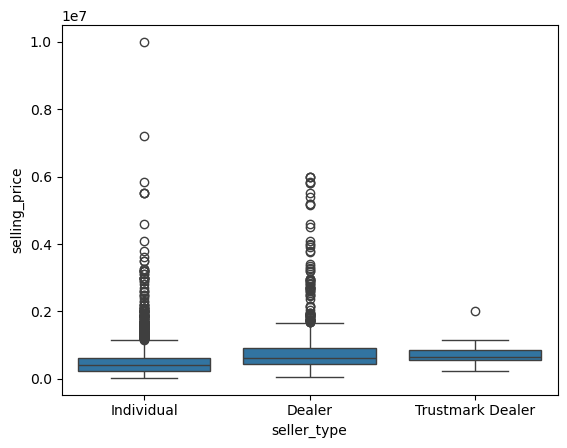

In [486]:
sns.boxplot(data=df,x="seller_type",y="selling_price")
plt.ylim=(0,7000000)
#the plot shows that the selling_price in average is higher for Dealer Seller Type than for individual,
#so this this categorical feature is infomaive however the categories are highly imbalanced with "Trustmark Dealer" 
#being only 0.4% of data and "Dealer" being only 10% data, for now we will unite "Trustmark Dealer" with "Dealer" 
#in model creation we should have in mind that "seller_type" is highely imbalanced

In [487]:
df["seller_type"]=df["seller_type"].replace({"Trustmark Dealer":"Dealer"})

<Axes: xlabel='seller_type', ylabel='count'>

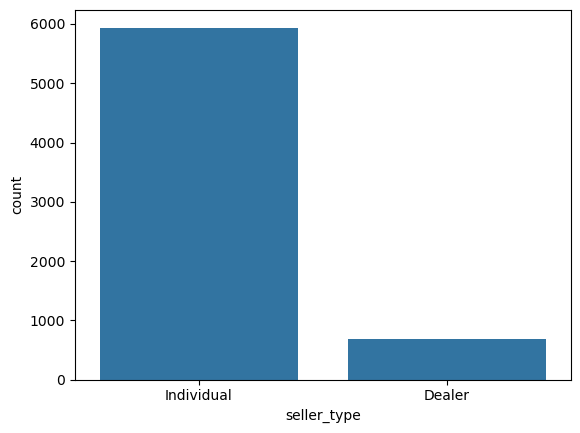

In [488]:
sns.countplot(data=df,x="seller_type")

<Axes: xlabel='fuel', ylabel='count'>

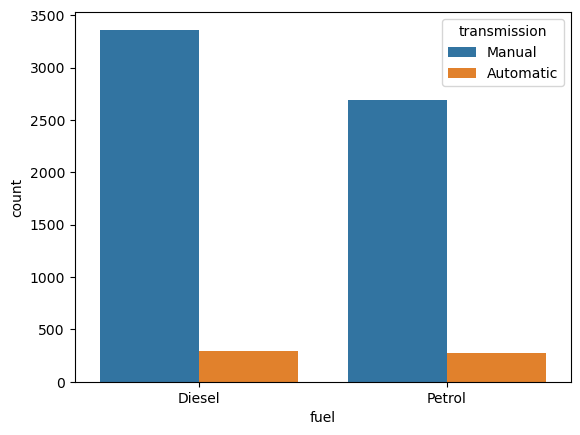

In [489]:
sns.countplot(data=df,x="fuel",hue="transmission")
#We can see that  Diesel and Petrol fuel usage is similar for  Automatic and Manual cars 

<Axes: xlabel='transmission', ylabel='count'>

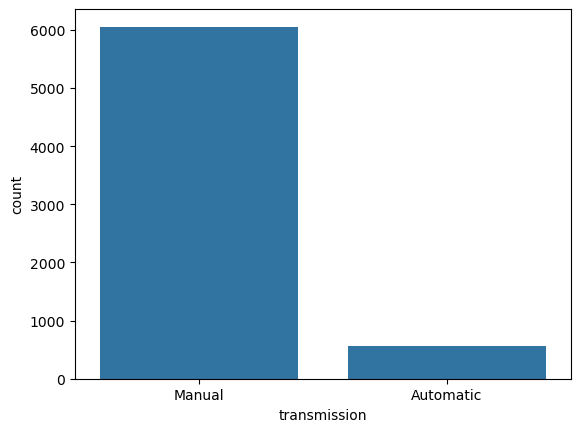

In [490]:
sns.countplot(data=df,x="transmission")

In [491]:
#Transmission is another highely imbalanced feature, only 8% of data has Automatic transmission
df_transmission=df[df["transmission"]=="Automatic"]
len(df_transmission)/len(df)*100

8.61756715967401

<Axes: xlabel='km_driven', ylabel='selling_price'>

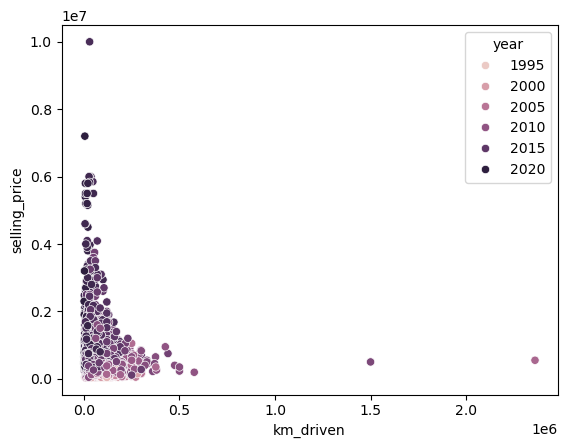

In [492]:
sns.scatterplot(data=df,x="km_driven",y="selling_price",hue="year")
#We can see that km_driven has some outliers

In [493]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[df['km_driven'] < 500000] 
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.07546030787805615

(-10000.0, 500000.0)

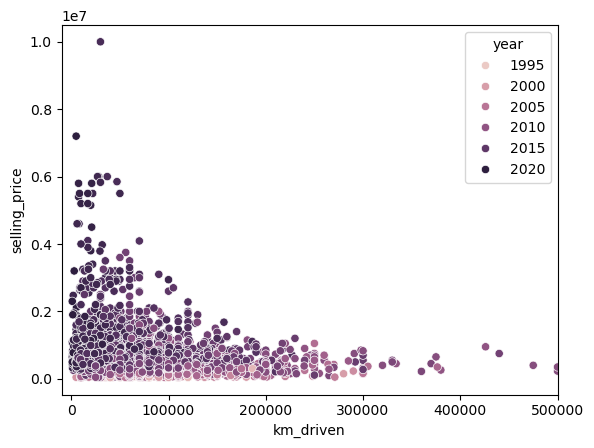

In [494]:
sns.scatterplot(data=df,x="km_driven",y="selling_price",hue="year")
plt.xlim(-10000,500000)
#We can see that the less km_driven and the newer the car, the more expensive it is

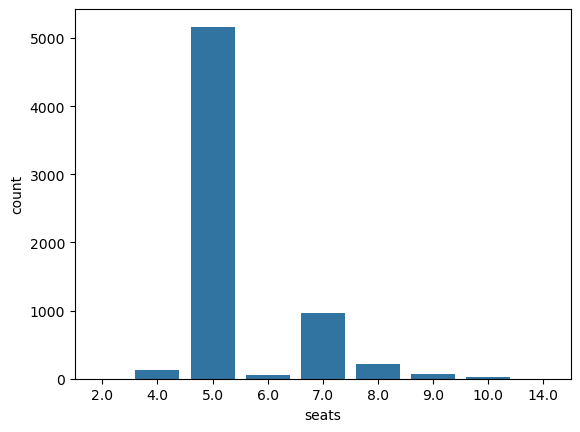

In [ ]:
sns.countplot(data=df,x="seats")
# plt.savefig("Nseats.png")

In [496]:
#It is better to have to bins for number of seats >5 and seats<=5
bins=[0,5,15] #Interval bins
labels=["5 or less","more than 5"]
df['seat_category'] = pd.cut(df['seats'], bins=bins, labels=labels)
#We will keep this new column and drop seats column
df=df.drop("seats",axis=1)

<Axes: xlabel='seat_category', ylabel='count'>

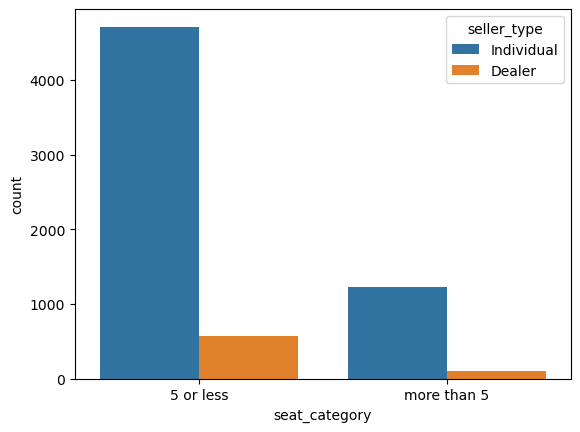

In [497]:
sns.countplot(data=df,x="seat_category",hue="seller_type")

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6626 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6626 non-null   int64   
 1   selling_price  6626 non-null   int64   
 2   km_driven      6626 non-null   int64   
 3   fuel           6626 non-null   object  
 4   seller_type    6626 non-null   object  
 5   transmission   6626 non-null   object  
 6   owner          6626 non-null   object  
 7   mileage        6626 non-null   float64 
 8   engine         6626 non-null   float64 
 9   max_power      6626 non-null   float64 
 10  seat_category  6626 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 576.0+ KB


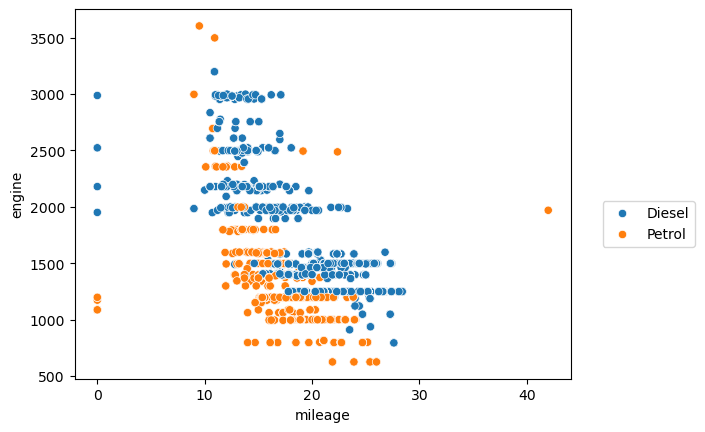

In [499]:
#mileage of the car vs engine capacity
sns.scatterplot(data=df,x="mileage",y="engine",hue="fuel")
plt.legend(bbox_to_anchor=(1.05,0.5))

In [500]:
#It looks like the cars with engine capacity>2000 Cubic Capacity mostly use Diesel
#We will also remove outliers in mileage

In [501]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[(df['mileage'] > 5) & (df['mileage'] < 40)]
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.24147298520977964

<Axes: xlabel='max_power', ylabel='transmission'>

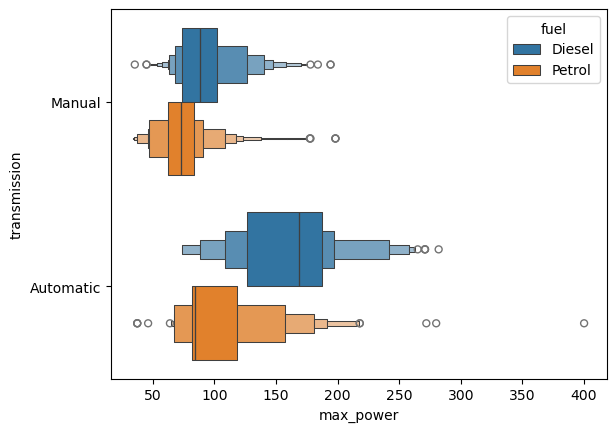

In [502]:
sns.boxenplot(data=df,x="max_power",y="transmission",hue="fuel")
#It looks like max_power in average is higher for Automatic transmission
#Lets remove the outliers in max_power

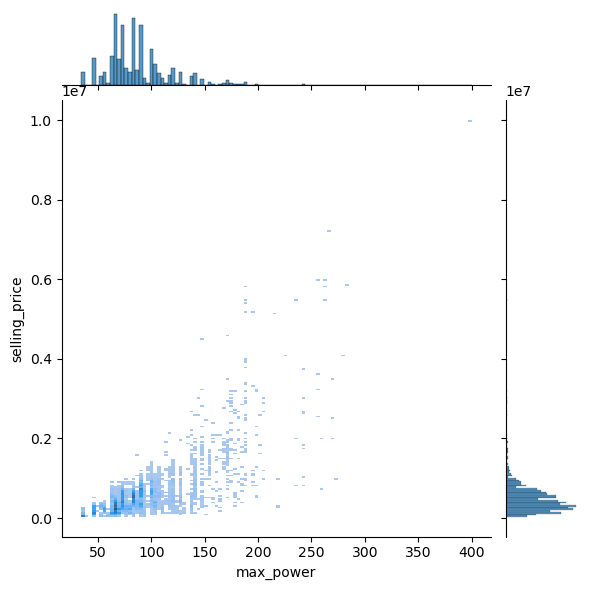

In [503]:
sns.jointplot(data=df,y="selling_price",x="max_power",kind="hist")
#we can see a correlation, the cars with small max_power have cheaper price

In [504]:
#Now lets remove all the outliers we discussed above
df_no_outliers_filter=(df['selling_price'] < 1300000) #with this tighter cut we loose 4.07% of data after above step ((6533-6267)/6533*100)
df_no_outliers_filter=df_no_outliers_filter & (df['year'] > 2000)
df_no_outliers_filter=df_no_outliers_filter & (df['km_driven'] < 500000)
df_no_outliers_filter=df_no_outliers_filter & (df['mileage'] > 5) & (df['mileage'] < 40)
df_no_outliers_filter=df_no_outliers_filter & (df["max_power"]<300)

In [505]:
(len(df)-len(df[df_no_outliers_filter]))/len(df) *100
#This removes 5.42 percent of data

5.418050105644431

In [506]:
df=df[df_no_outliers_filter]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6267 non-null   int64   
 1   selling_price  6267 non-null   int64   
 2   km_driven      6267 non-null   int64   
 3   fuel           6267 non-null   object  
 4   seller_type    6267 non-null   object  
 5   transmission   6267 non-null   object  
 6   owner          6267 non-null   object  
 7   mileage        6267 non-null   float64 
 8   engine         6267 non-null   float64 
 9   max_power      6267 non-null   float64 
 10  seat_category  6267 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 544.8+ KB


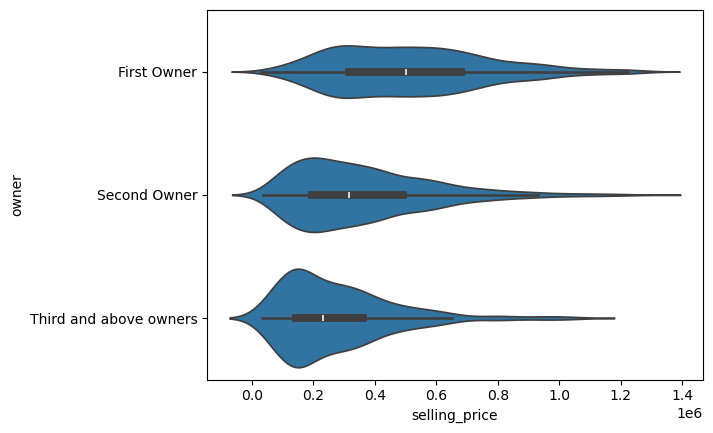

In [ ]:
#We can see that selling price has a very different distribution for each category below, and thus it is useful to include this feature in modeling
sns.violinplot(data=df,x="selling_price",y="owner")
# plt.savefig("price_owner.png",bbox_inches="tight")

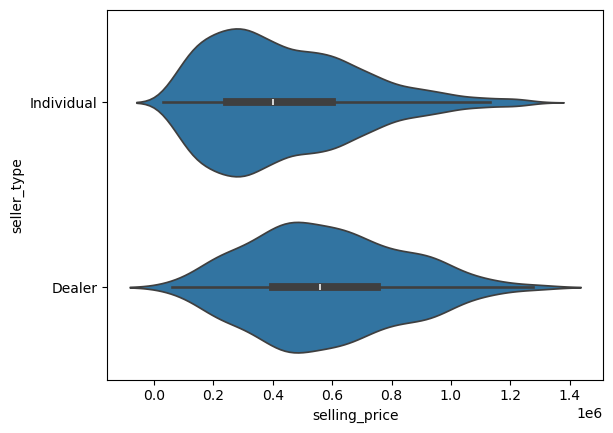

In [ ]:
#We can see that selling price has a very different distribution for each category below, and thus it is useful to include this feature in modeling
sns.violinplot(data=df,x="selling_price",y="seller_type")
# plt.savefig("price_sellertype.png",bbox_inches="tight")


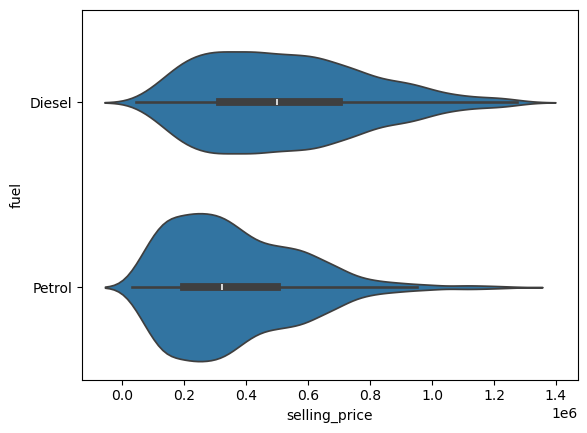

In [ ]:
sns.violinplot(data=df,x="selling_price",y="fuel")
# plt.savefig("price_fuel.png",bbox_inches="tight")



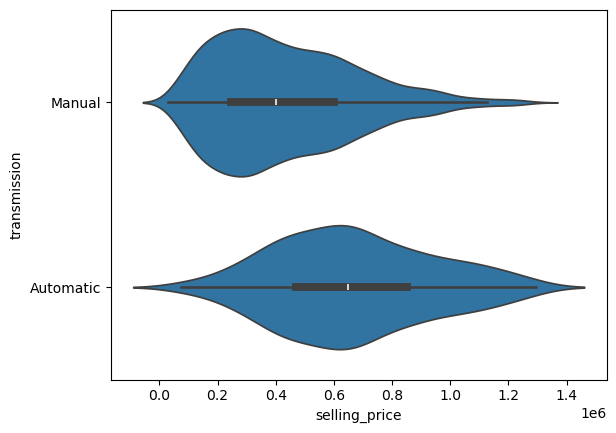

In [ ]:
#We can see that selling price has a very different distribution for each category below, and thus it is useful to include this feature in modeling
sns.violinplot(data=df,x="selling_price",y="transmission")
# plt.savefig("price_transmission.png",bbox_inches="tight")


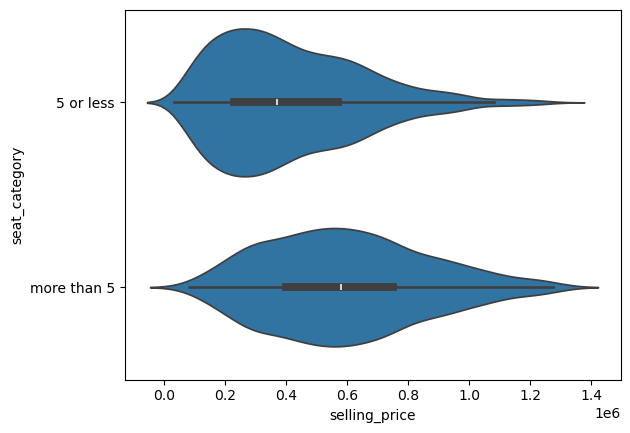

In [ ]:

sns.violinplot(data=df,x="selling_price",y="seat_category")
# plt.savefig("price_Nseats.png",bbox_inches="tight")

In [512]:
#Now lets use one-hot encoding for categorical variables
df_corr=pd.get_dummies(df).corr()["selling_price"]

In [513]:
df_corr

year                            0.629347
selling_price                   1.000000
km_driven                      -0.197343
mileage                         0.064489
engine                          0.373973
max_power                       0.549165
fuel_Diesel                     0.322558
fuel_Petrol                    -0.322558
seller_type_Dealer              0.163611
seller_type_Individual         -0.163611
transmission_Automatic          0.218901
transmission_Manual            -0.218901
owner_First Owner               0.339765
owner_Second Owner             -0.218446
owner_Third and above owners   -0.223903
seat_category_5 or less        -0.281689
seat_category_more than 5       0.281689
Name: selling_price, dtype: float64

In [514]:
df_corr_plot=df_corr.drop("selling_price").sort_values()

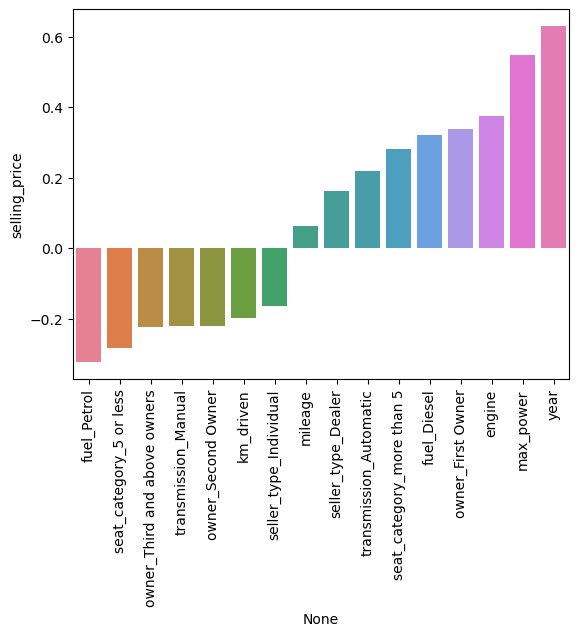

In [ ]:
sns.barplot(x=df_corr_plot.index,y=df_corr_plot,hue=df_corr_plot.index)
plt.xticks(rotation=90)
# plt.savefig("salesprice_corr.png",bbox_inches="tight")

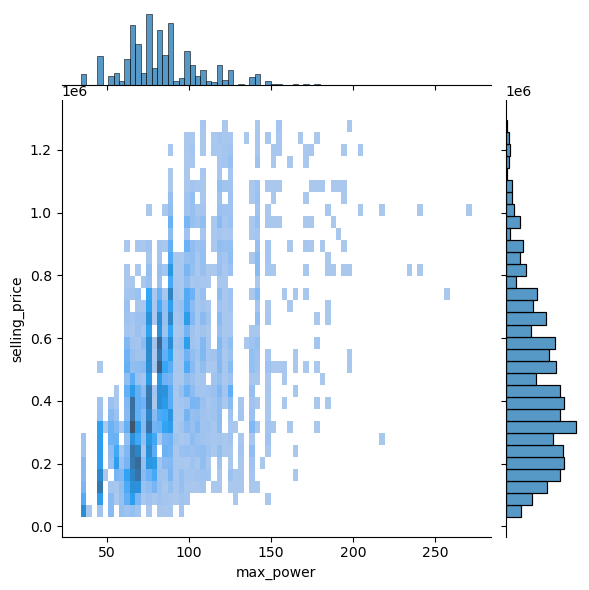

In [ ]:
#We can see the features with highest correlations with "Selling_price" on the very left and right sides,
#where max_power shows the highest correlation
#second highest correlation is with year and third highest with engine
sns.jointplot(data=df,y="selling_price",x="max_power",kind="hist")
# plt.savefig("salesprice_maxpower.png")

<Axes: xlabel='max_power', ylabel='selling_price'>

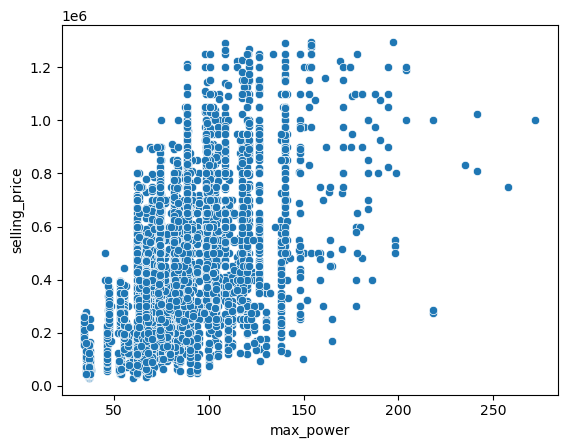

In [517]:
sns.scatterplot(data=df,y="selling_price",x="max_power")

<Axes: xlabel='engine', ylabel='selling_price'>

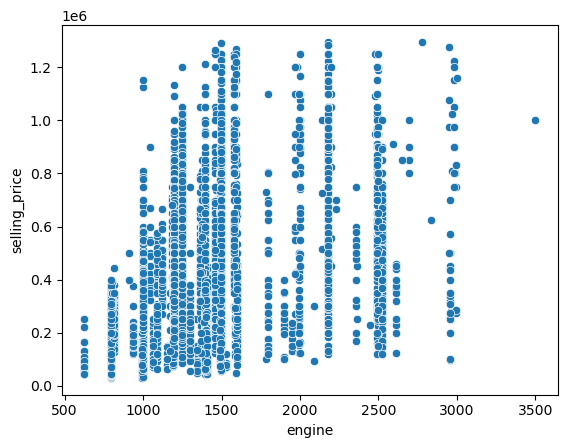

In [518]:
sns.scatterplot(data=df,y="selling_price",x="engine")

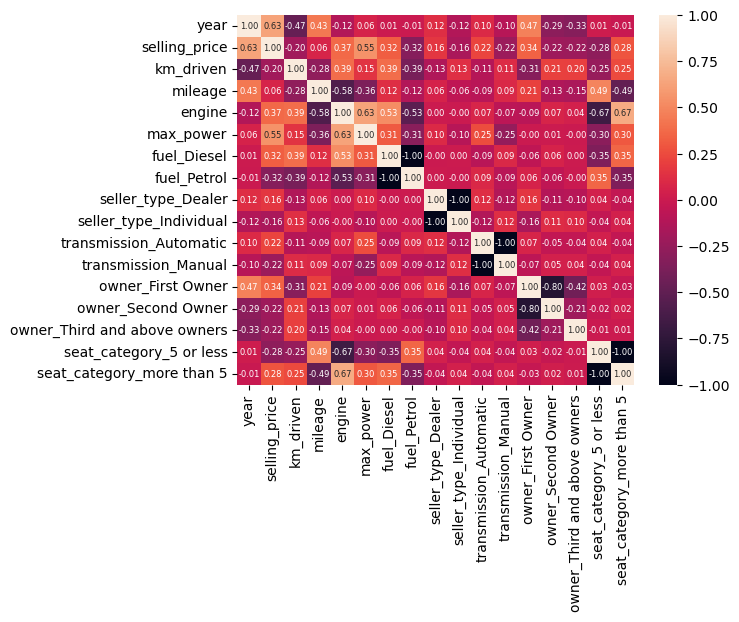

In [ ]:
sns.heatmap(pd.get_dummies(df).corr(),annot=True,annot_kws={"size": 6},fmt='.2f')
# plt.savefig("2D_corr.png",bbox_inches='tight')

In [520]:
# We can see that features with high correlations
#max_power and engine
#Engine and milage
#max_power vs milage
#engine with fuel type
#seat_category and engine
#year and km driven 

<Axes: xlabel='max_power', ylabel='engine'>

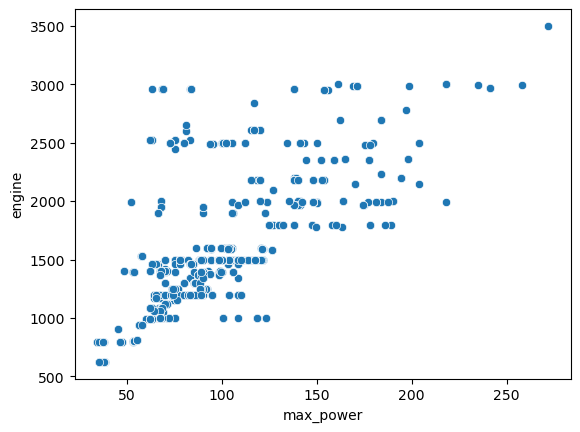

In [521]:
sns.scatterplot(data=df,y="engine",x="max_power")

<Axes: xlabel='mileage', ylabel='engine'>

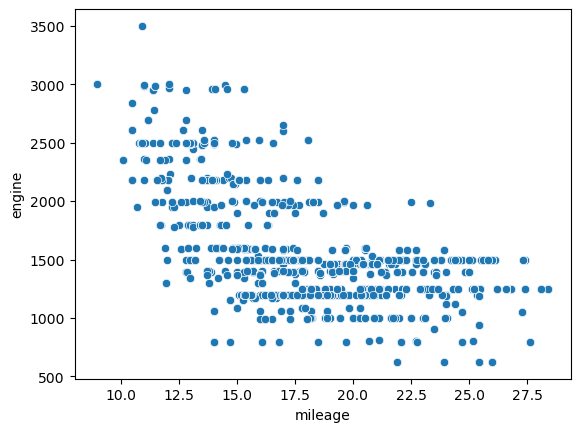

In [522]:
sns.scatterplot(data=df,y="engine",x="mileage")

<Axes: xlabel='mileage', ylabel='max_power'>

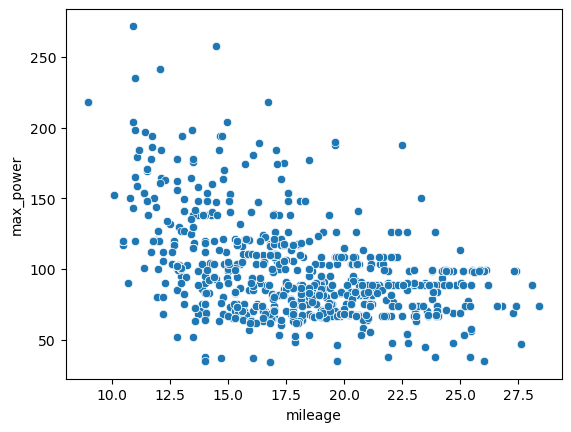

In [523]:
sns.scatterplot(data=df,y="max_power",x="mileage")

<Axes: xlabel='year', ylabel='km_driven'>

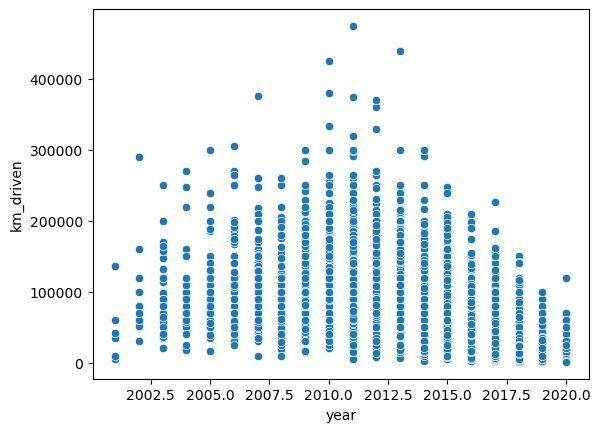

In [524]:
sns.scatterplot(data=df,y="km_driven",x="year")

In [525]:
# For features with high correlation > 0.8 , we only keep one of them.

In [526]:
df=pd.get_dummies(df,drop_first=True)

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6267 non-null   int64  
 1   selling_price                 6267 non-null   int64  
 2   km_driven                     6267 non-null   int64  
 3   mileage                       6267 non-null   float64
 4   engine                        6267 non-null   float64
 5   max_power                     6267 non-null   float64
 6   fuel_Petrol                   6267 non-null   bool   
 7   seller_type_Individual        6267 non-null   bool   
 8   transmission_Manual           6267 non-null   bool   
 9   owner_Second Owner            6267 non-null   bool   
 10  owner_Third and above owners  6267 non-null   bool   
 11  seat_category_more than 5     6267 non-null   bool   
dtypes: bool(6), float64(3), int64(3)
memory usage: 379.4 KB


In [528]:
# We start with 8128 data points (rows)
# We then remove 215 rows with missing values for multiple columns, we are left with 7913 entries (2.6 % less statistics). 
# We then remove 1.1% of these corresponding to "LPG" and "CNG" underrepresented gas fuel types and this leaves 7819 enries.
# Then we remove duplicated rows, which drops entries to 6612 (removes 15 %).
# We then remove 0.07% data corresponding to "Test Drive Car" of Owner category, and get 6607 entries.
# After removing outliers (1.4 percent of remaining data) we are left with 6514 data points.


In [529]:
target_loc_entire = "../data/processed/Car_details_v3_cleaned.csv" 
df.to_csv(target_loc_entire)